In [2]:
path = "http://www.pilio.idv.tw/ltohk/listbbk.asp?indexpage=1&orderby=new"

pathLi =[]
for i in range(1, 75):
    path = "http://www.pilio.idv.tw/ltohk/listbbk.asp?indexpage={}&orderby=new".format(i)
    pathLi.append(path)

In [3]:
import requests
import os

for i in range(0, 74):
    re = requests.get(pathLi[i])
    re.encoding = 'big5'
    if not os.path.isdir("lottery"):
        os.makedirs("lottery")
    file = open("lottery/"+str(i),'w' ,encoding='utf8')
    file.write(re.text)
    file.close()

In [4]:
import os
pathLi = []

##for Graduated directory
fileli = os.listdir("lottery")
for name in fileli:
    pathLi.append("lottery/" + name)

In [5]:
import pandas as pd

def processAsDist(path):
    tables = pd.read_html(path,encoding='utf8')
    df_lottery = tables[1]
    df_lottery.drop([1,4],axis=1,inplace=True)
    df_lottery.drop(0,inplace=True)
    df_lottery.columns = ['期數','六合彩中獎號碼','特別號']

    def processSixNum(row):
        nums = pd.Series(row['六合彩中獎號碼'].replace(" ","").split(',')).astype(int)
        nums.sort_values()
        row['one'] = nums[0]
        row['two'] = nums[1]    
        row['three'] = nums[2]    
        row['four'] = nums[3]
        row['five'] = nums[4]    
        row['six'] = nums[5]    
        return row
    df_lottery = df_lottery.apply(processSixNum,axis=1)
    df_lottery.drop('六合彩中獎號碼', axis=1,inplace=True)

    def ToDIct(Row):
        def ToStr(item):
            if(pd.isnull(item)):
                return None
            else:
                return str(item)
        return Row.apply(ToStr).to_dict()

    df_lottery = df_lottery.apply(ToDIct, axis=1).tolist()
    return df_lottery

In [6]:
lotteryObjs = []
for path in pathLi:
    lotteryObjs.extend(processAsDist(path))
print(len(lotteryObjs))

2220


# 每一期的開獎號碼

In [8]:
columns = ['期數','one','two','three','four','five','six','特別號']
df_lottery = pd.DataFrame(lotteryObjs)[columns]
df_lottery

,期數,one,two,three,four,five,six,特別號
0,2247,16,34,35,36,40,46,31
1,2246,4,7,10,21,28,47,17
2,2245,4,23,24,33,40,43,15
3,2244,2,23,32,34,43,45,22
4,2243,5,21,24,29,43,44,42
5,2242,3,4,7,19,20,23,27
6,2241,3,4,15,25,38,45,28
7,2240,18,22,25,32,33,42,29
8,2239,8,10,25,28,33,37,07
9,2238,14,25,32,35,39,48,31


# 第X個(次序)號碼的分布

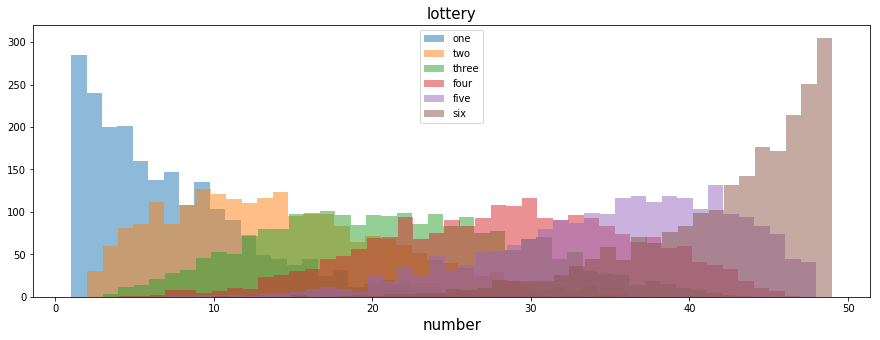

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
Li = df_lottery['one'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='one')
Li = df_lottery['two'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='two')
Li = df_lottery['three'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='three')
Li = df_lottery['four'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='four')
Li = df_lottery['five'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='five')
Li = df_lottery['six'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='six')

plt.axis = range(1,50)

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

# 每個號碼出現的次數

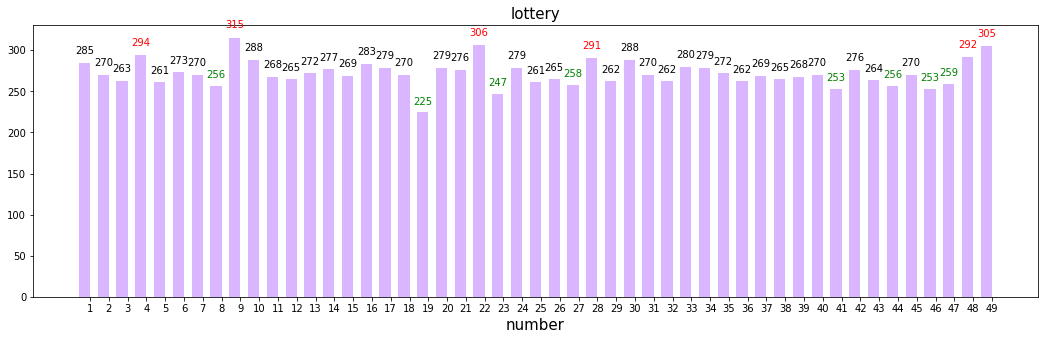

In [60]:
df = pd.Series(Counter(df_lottery_total))

width = 0.6      # the width of the bars

fig, ax = plt.subplots(figsize=(18, 5))
rects = ax.bar(range(1, 50), list(df), width, color='#D9B6FF')

plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(tuple(df.index))

for rect in rects:
    height = rect.get_height()
    if int(height) > 290:
        ax.text(rect.get_x() + rect.get_width()/2, 1.03*height, '%d' % int(height), ha='center', va='bottom', color='r')
    elif int(height) < 260 :
        ax.text(rect.get_x() + rect.get_width()/2, 1.03*height, '%d' % int(height), ha='center', va='bottom', color='g')
    else:
        ax.text(rect.get_x() + rect.get_width()/2, 1.03*height, '%d' % int(height), ha='center', va='bottom')
            
plt.show()

# For Test

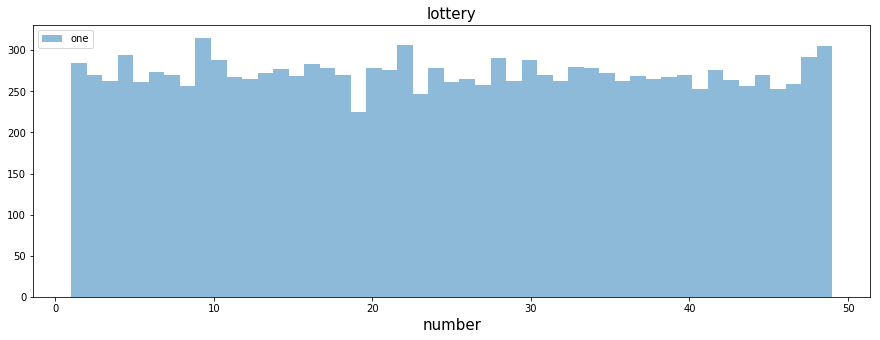

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,285,270,263,294,261,273,270,256,315,288,268,265,272,277,269,283,279,270,225,279,276,306,247,279,261,265,258,291,262,288,270,262,280,279,272,262,269,265,268,270,253,276,264,256,270,253,259,292,305


In [46]:
from collections import Counter
from pprint import pprint
df_lottery_total = list(df_lottery['one'])+list(df_lottery['two'])+list(df_lottery['three'])+list(df_lottery['four'])+list(df_lottery['five'])+list(df_lottery['six'])
df_lottery_total = pd.Series(df_lottery_total).astype(int)

plt.figure(figsize=(15, 5))
plt.hist(df_lottery_total ,bins=49 , alpha=0.5,label='one')

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()


def color_over_300(val):
    if val >300:
        color = 'red' 
    elif val < 260:
        color = 'yellow'
    else:
        color = 'black'
    return 'color: %s' % color

df = pd.DataFrame(pd.Series(Counter(df_lottery_total)))
df.T.style.applymap(color_over_300)

In [49]:
from pymongo import MongoClient
conn = MongoClient('localhost', 27017)
db = conn.SuperUniversityCourses
collection = db['lottery']

for path in pathLi:
    collection.insert_many(processAsDist(path))

In [50]:
cursor = collection.find()
lotteries = [i for i in cursor]

In [55]:
df_lottery = pd.DataFrame(lotteries)
# df_lottery
columns = ['期數','one','two','three','four','five','six','特別號']
df_lottery = df_lottery[columns]

In [57]:
df_lottery.to_csv('lotteryNums.csv')

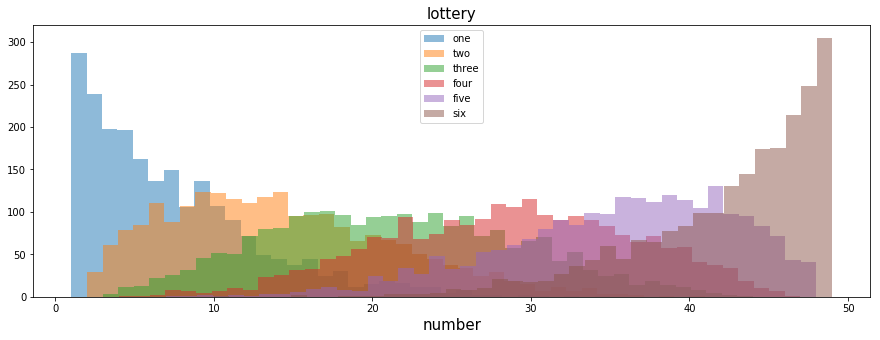

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
Li = df_lottery['one'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='one')
Li = df_lottery['two'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='two')
Li = df_lottery['three'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='three')
Li = df_lottery['four'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='four')
Li = df_lottery['five'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='five')
Li = df_lottery['six'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='six')

plt.axis = range(1,50)

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

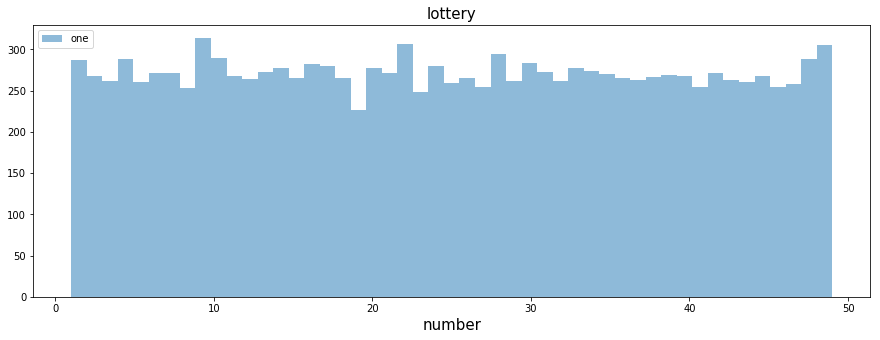

In [82]:
df_lottery_total = list(df_lottery['one'])+list(df_lottery['two'])+list(df_lottery['three'])+list(df_lottery['four'])+list(df_lottery['five'])+list(df_lottery['six'])
df_lottery_total = pd.Series(df_lottery_total).astype(int)

plt.figure(figsize=(15, 5))
plt.hist(df_lottery_total ,bins=49 , alpha=0.5,label='one')

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

In [94]:
from collections import Counter
count = pd.Series(Counter(list(df_lottery_total)))

count.sort_values()
